# EDA for News Sentiment Anaysis

In [4]:
import pandas as pd

# Load data and parse the 'date' column
df = pd.read_csv("E:/Tenx/Week 1/Data/raw_analyst_ratings.csv", parse_dates=["date"])

# Preview
print(df.head())


   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [5]:
len(df)

1407328

Descriptive Statistics


In [ ]:
# ** Headline Length ***
df["headline_length"] = df["headline"].str.len()

print("Headline Length Stats:")
print(df["headline_length"].describe())


Headline Length Stats:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [7]:
# Most Frequent Publishers

top_publishers = df["publisher"].value_counts().head(10)
print("Top 10 Publishers:\n", top_publishers)



Top 10 Publishers:
 publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


Date Range:
2011-04-27 21:01:48-04:00 to 2020-06-11 17:12:35-04:00


<Axes: title={'center': 'Articles Published Per Day'}, xlabel='date'>

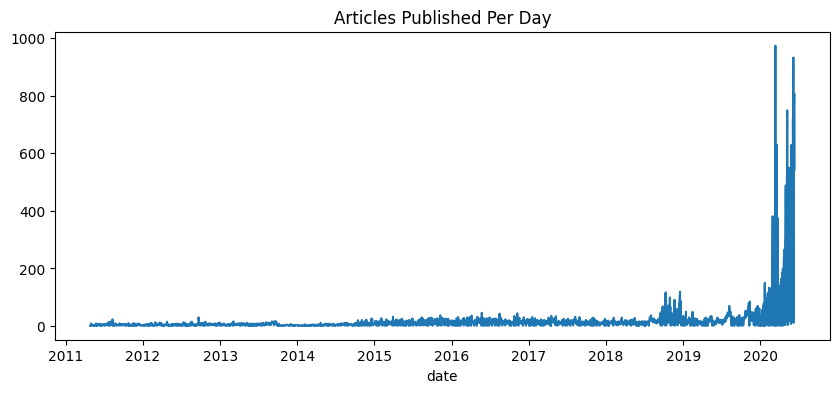

In [23]:
# Date Range and Frequency
print("Date Range:")
print(df["date"].min(), "to", df["date"].max())

# Articles per day
articles_per_day = df["date"].dt.date.value_counts().sort_index()
articles_per_day.plot(kind='line', title="Articles Published Per Day", figsize=(10, 4))



In [ ]:
from textblob import TextBlob
import nltk
import string

# nltk.download('punkt')  # Run this once if needed


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\betsi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [11]:

# Sentiment polarity using TextBlob
df["sentiment"] = df["headline"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Show sentiment stats
print("Sentiment Score Summary:")
print(df["sentiment"].describe())

Sentiment Score Summary:
count    1.407328e+06
mean     4.905657e-02
std      1.830652e-01
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: sentiment, dtype: float64


In [12]:
print(df.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  headline_length  sentiment  
0  2020-06-05 10:30:54-04:00     A               39        0.0  
1  2020-06

In [18]:
df["sentiment"].value_counts()

sentiment
 0.000000    934928
 0.500000     86313
 0.250000     31492
 0.136364     16654
 0.100000     15469
              ...  
-0.170635         1
 0.041818         1
-0.047500         1
-0.155804         1
 0.026452         1
Name: count, Length: 5133, dtype: int64

In [19]:
def label_sentiment(score):
    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"

df["sentiment_label"] = df["sentiment"].apply(label_sentiment)
print(df["sentiment_label"].value_counts())


sentiment_label
neutral     934928
positive    341161
negative    131239
Name: count, dtype: int64


In [21]:
df["date"] = pd.to_datetime(df["date"], errors='coerce')

Time-Based EDA

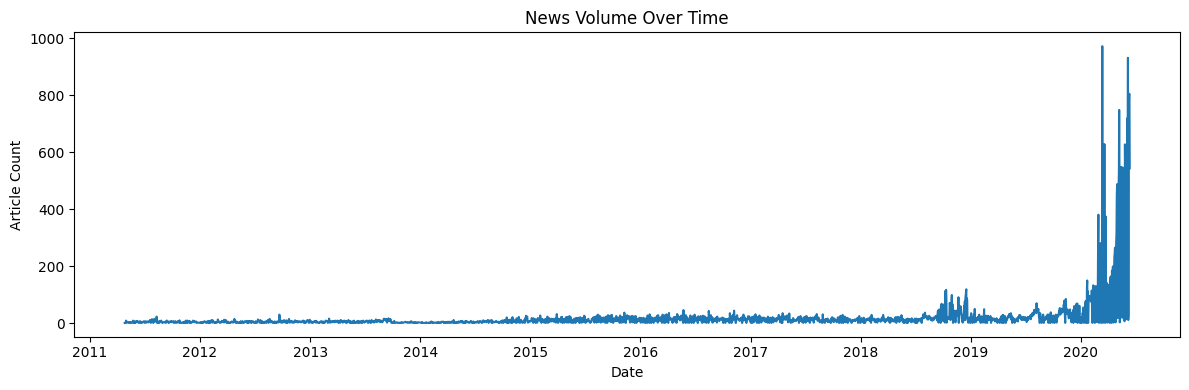

In [22]:
# Publication Frequency Per Day
import matplotlib.pyplot as plt

df["pub_day"] = df["date"].dt.date
daily_counts = df.groupby("pub_day").size()

plt.figure(figsize=(12, 4))
daily_counts.plot()
plt.title("News Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Article Count")
plt.tight_layout()
plt.show()


In [25]:
# Hourly Distribution: Extract hour if timestamp includes time
if df["date"].dt.hour.notnull().all():
    df["hour"] = df["date"].dt.hour
    df["hour"].value_counts().sort_index().plot(kind='bar', title="Article Frequency by Hour", figsize=(10, 4))


<Axes: title={'center': 'Top 10 Publishers'}, xlabel='publisher', ylabel='Article Count'>

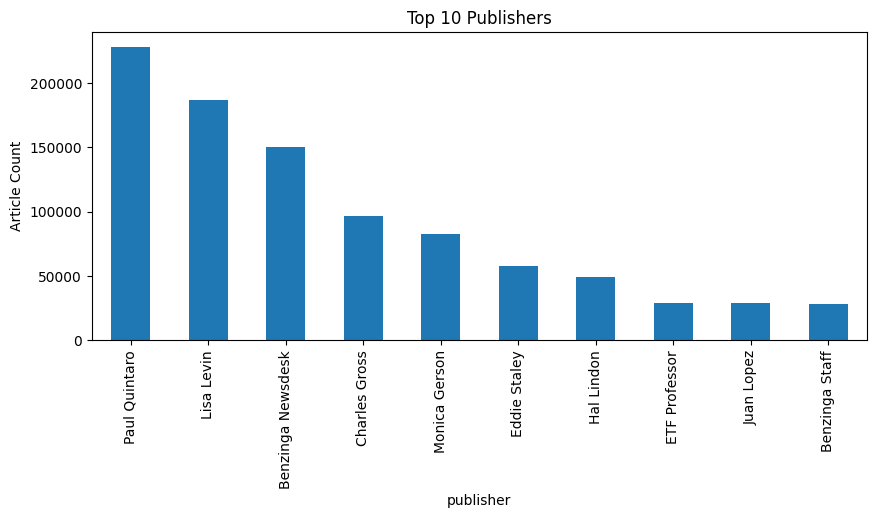

In [27]:
# Most Active Publishers
publisher_counts = df["publisher"].value_counts().head(10)
publisher_counts.plot(kind='bar', title="Top 10 Publishers", ylabel="Article Count", figsize=(10, 4))


In [29]:
# Domain Analysis: Extract domain names from email-style publisher fields
df["publisher_domain"] = df["publisher"].str.extract(r'@([\w\.-]+)')
top_domains = df["publisher_domain"].value_counts().head(5)

print("Top Publisher Domains:")
print(top_domains)


Top Publisher Domains:
publisher_domain
benzinga.com      7937
gmail.com          139
andyswan.com         5
investdiva.com       2
tothetick.com        2
Name: count, dtype: int64


Summary Metrics

In [30]:
print("Total Records:", len(df))
print("Unique Publishers:", df['publisher'].nunique())
print("Headline Sentiment Sample:", df[['headline', 'sentiment']].head())


Total Records: 1407328
Unique Publishers: 1034
Headline Sentiment Sample:                                             headline  sentiment
0            Stocks That Hit 52-Week Highs On Friday        0.0
1         Stocks That Hit 52-Week Highs On Wednesday        0.0
2                      71 Biggest Movers From Friday        0.0
3       46 Stocks Moving In Friday's Mid-Day Session        0.0
4  B of A Securities Maintains Neutral on Agilent...        0.0


# Load Stock Price Data (from local CSV)

In [33]:
import pandas as pd

# Load AAPL historical data from your local directory
aapl_path = r"E:\Tenx\Week 1\Data\yfinance_data\AAPL_historical_data.csv"
df = pd.read_csv(aapl_path, parse_dates=["Date"])

# Set Date as the index
df.set_index("Date", inplace=True)

# Preview the data
print(df.head())


                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

            Dividends  Stock Splits  
Date                                 
1980-12-12        0.0           0.0  
1980-12-15        0.0           0.0  
1980-12-16        0.0           0.0  
1980-12-17        0.0           0.0  
1980-12-18        0.0           0.0  


In [34]:
# ***Calculate Technical Indicators with TA-Lib***

import talib

# Calculate RSI (Relative Strength Index)
df["RSI"] = talib.RSI(df["Close"], timeperiod=14)

# Calculate SMA (Simple Moving Average)
df["SMA_20"] = talib.SMA(df["Close"], timeperiod=20)

# Calculate MACD
df["MACD"], df["MACD_Signal"], df["MACD_Hist"] = talib.MACD(df["Close"], fastperiod=12, slowperiod=26, signalperiod=9)

# Optional: check the last few rows
df.tail()


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,RSI,SMA_20,MACD,MACD_Signal,MACD_Hist
Date,,,,,,,,,,,,,
2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0,48.687742,224.228500,4.662717,6.678882,-2.016164
2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0,47.386437,224.440500,3.748082,6.092722,-2.344640
2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0,48.055700,224.633500,3.026267,5.479431,-2.453164
2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0,48.476184,225.014500,2.448591,4.873263,-2.424672
2024-07-30,219.190002,220.330002,216.119995,218.800003,218.547043,41643800,0.0,0.0,49.359115,225.117001,2.012764,4.301163,-2.288399


Visualize the Trends

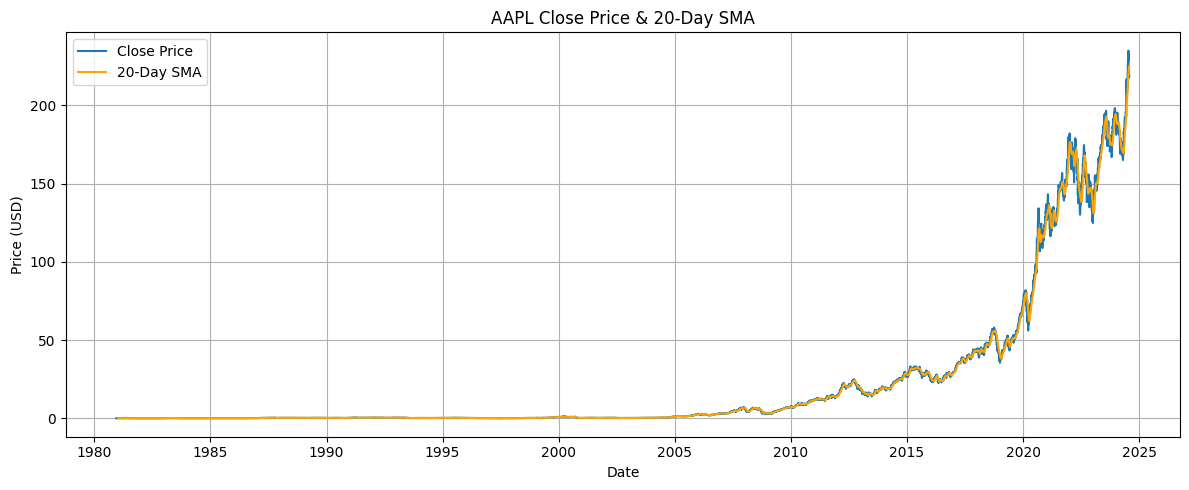

In [36]:
# Plot 1: Closing Price with SMA
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df["Close"], label="Close Price")
plt.plot(df["SMA_20"], label="20-Day SMA", color="orange")
plt.title("AAPL Close Price & 20-Day SMA")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


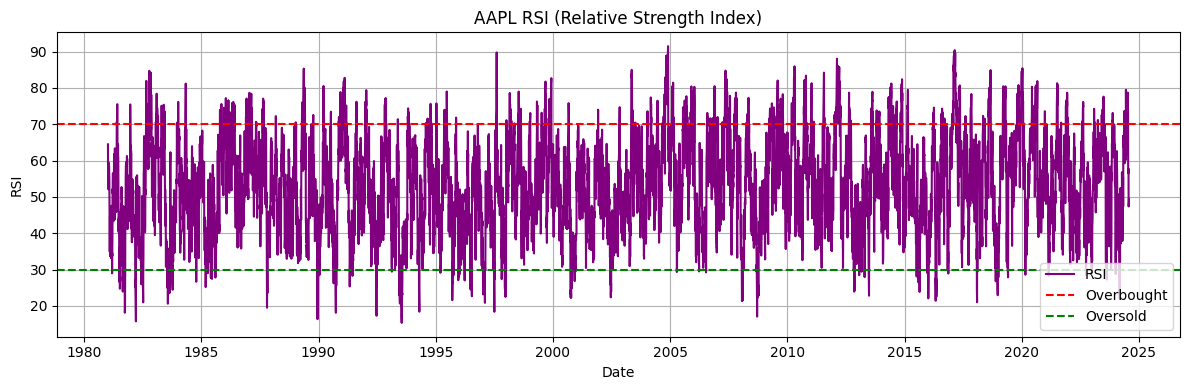

In [37]:
# Plot 2: RSI Chart
plt.figure(figsize=(12, 4))
plt.plot(df["RSI"], label="RSI", color="purple")
plt.axhline(70, color="red", linestyle="--", label="Overbought")
plt.axhline(30, color="green", linestyle="--", label="Oversold")
plt.title("AAPL RSI (Relative Strength Index)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\betsi\AppData\Local\Temp\ipykernel_19756\1895025220.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
e:\Tenx\Week 1\Project\news_sentiment_stock\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


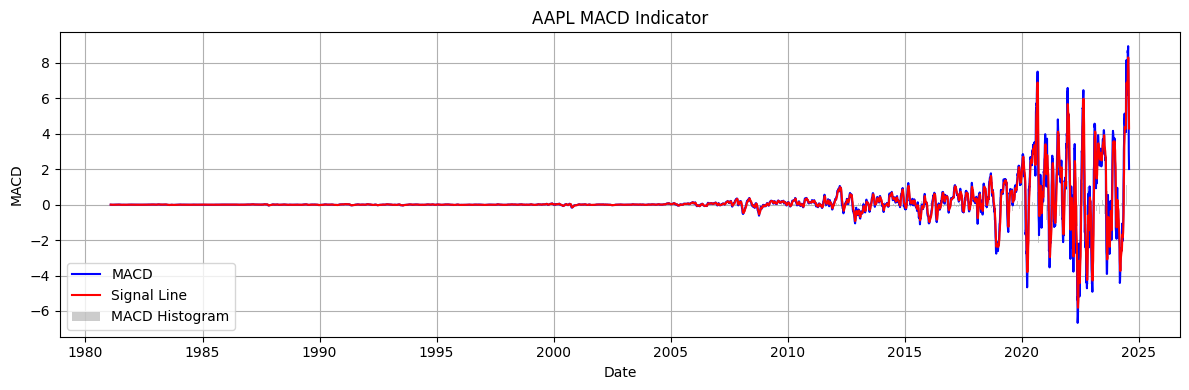

In [38]:
# Plot 3: MACD with Histogram
plt.figure(figsize=(12, 4))
plt.plot(df["MACD"], label="MACD", color="blue")
plt.plot(df["MACD_Signal"], label="Signal Line", color="red")
plt.bar(df.index, df["MACD_Hist"], label="MACD Histogram", color="gray", alpha=0.4)
plt.title("AAPL MACD Indicator")
plt.xlabel("Date")
plt.ylabel("MACD")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
